# Lecture 3 - April 5th

# Simple plotting with Matplotlib

Announcements
1. We have a new UGIA: Andrew Lona
2. Adnan Shahpurwala will guest speak next Weds
3. Quiz due on Sunday
4. Problem set due on Sunday
5. Discussion board post
6. Problem set solutions for problem set 1 will be uploaded 
after class
7.   Going over Quiz 1

Today's topic
1.   Make some simple plots
2.   Learn how to change how your data and figure look
3.   Plot multiple things, add legends, subplots
4.   Object-oriented vs. procedural plotting
5.   Saving plots
Today, we will be doing some simple plotting in python using matplotlib. As always, let's add numpy and pandas. Its better to import these and not use them then realize half-through that we wanted to use them and not have them

In [ ]:
import numpy as np
import pandas as pd

Now, let's add matplotlib. Matplotlib is just one library of plotting functions that we will be using. 

In [ ]:
import matplotlib.pyplot as plt

We will use this magic function so that plots appear in line. Its not necessary with colab, but its a useful line to know in the future if you were using a different python source

In [ ]:
%matplotlib inline

Let's use some of the data that was used in the problem set due last week

In [ ]:
data = pd.read_csv('problem_set_1_data.csv')

In [ ]:
data.head()

,quizzes,attendedClass,finalgrade,final_EXAM,student
0,78.50,1,99.38,46,Linnie Lietz
1,64.25,0,95.78,45,Mitch Mustain
2,76.75,0,97.42,41,Salina Chavera
3,69.00,1,92.50,38,Kimberely Conwell
4,64.00,0,92.50,39,Zack Burk


In [ ]:
quizzes = np.sort(data['quizzes'])
exams = np.sort(data['final_EXAM'])
x = np.arange(0,len(quizzes))

We are going to talk about two ways to plot data

The first is the functional/procedural method, which is useful when making quick plots. You will likely be fine just using this approach in most situations, but when you need greater control, you will probably use the second method 

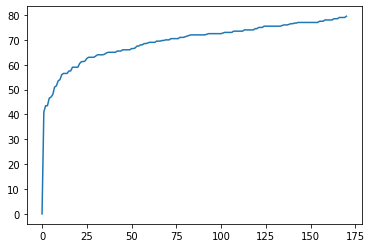

In [ ]:
plt.plot(x,quizzes)

Depending on your python platform, you may need to have plt.show() at the end

In colab, that line removes the text portion at the top of the plot

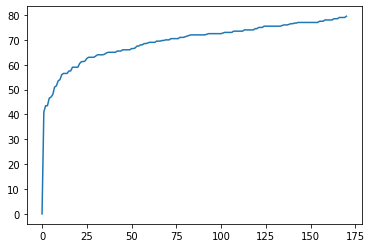

In [ ]:
plt.plot(x,quizzes)
plt.show()

Plotting data without the axes labels and without a title means that no one will understand what your data is

Text(0.5, 1.0, 'Quiz points')

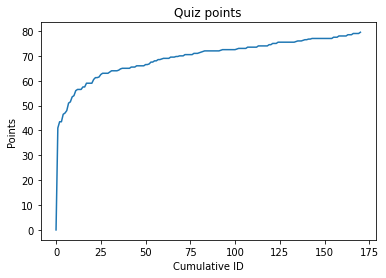

In [ ]:
plt.plot(x,quizzes)
plt.xlabel('Cumulative ID')
plt.ylabel('Points')
plt.title('Quiz points')

Let's say you want to put two things on the plot

We dont have to worry about the lines looking the same because python makes them different for us

Text(0.5, 1.0, 'Quiz points')

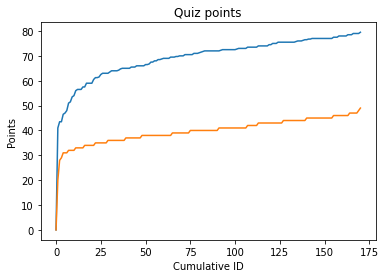

In [ ]:
plt.plot(x,quizzes)
plt.plot(x,exams)
plt.xlabel('Cumulative ID')
plt.ylabel('Points')
plt.title('Grades in class')

Think of plotting like canvas. You start with a blank set of axes (in this case, its implicit), then you add layer by layer with the plt.plot functions. 

If we add labels to the plt.plot objects, we can then reference those with a legend

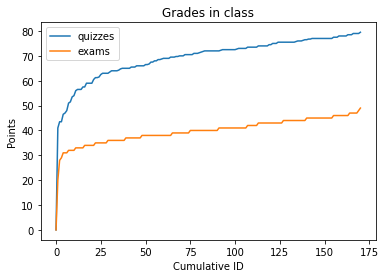

In [ ]:
plt.plot(x,quizzes,label = 'quizzes') # label tells you what the line will be called
plt.plot(x,exams,label = 'exams')
plt.xlabel('Cumulative ID')
plt.ylabel('Points')
plt.title('Grades in class')
plt.legend()

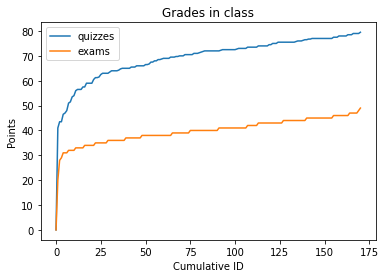

In [ ]:
plt.plot(x,quizzes,label = 'quizzes') # label tells you what the line will be called
plt.plot(x,exams,label = 'exams')
plt.xlabel('Cumulative ID')
plt.ylabel('Points')
plt.title('Grades in class')
plt.legend(loc=0) # you can quickly change the position of the legend using loc

We, of course, aren't restricted to just the way python automatically plots things. We have a lot of control by inputing different parameters

Text(0.5, 1.0, 'Grades in class')

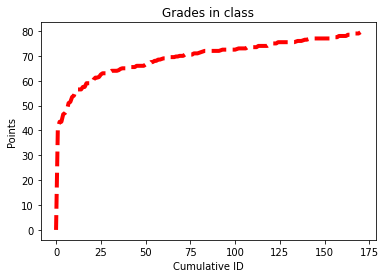

In [ ]:
plt.plot(x,quizzes,
         color='r',
         linewidth=4,
         linestyle='--')
plt.xlabel('Cumulative ID')
plt.ylabel('Points')
plt.title('Grades in class')

For some aethestics, you can just bundle them, but I'm not a big fan of that, only because you can't put all changes inside of the quotes

Text(0.5, 1.0, 'Grades in class')

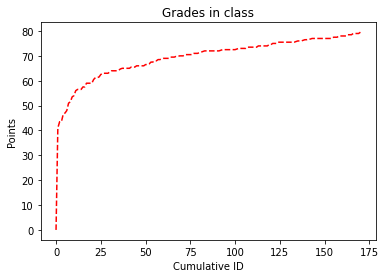

In [ ]:
plt.plot(x,quizzes,'r--')
plt.xlabel('Cumulative ID')
plt.ylabel('Points')
plt.title('Grades in class')

Check the documentation below for the list of everything you can do with plot

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html

And check out this for exactly what each part of the object is:
https://pbpython.com/effective-matplotlib.html

Here is another example, where we remove the line and add some markers. Markers are the specific data points you are inserting. So if you look at the plot, we should expect a marker at 0,0 for example

Text(0.5, 1.0, 'Grades in class')

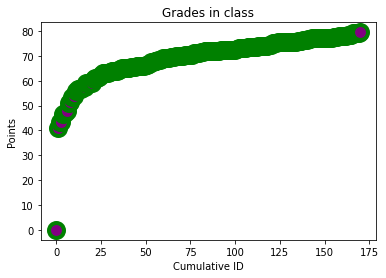

In [ ]:
plt.plot(x,quizzes,
         linestyle='',
         marker='o',
         markersize=15,
         markerfacecolor='purple',
         markeredgecolor='green',
         markeredgewidth=4)
plt.xlabel('Cumulative ID')
plt.ylabel('Points')
plt.title('Grades in class')

*What will the next plot look like?*

Text(0.5, 1.0, 'Grades in class')

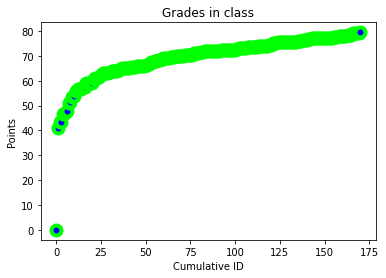

In [ ]:
plt.plot(x,quizzes,
         linestyle='',
         marker='o',
         markersize=10,
         markerfacecolor=[0,0,1], # can also use RGB values
         markeredgecolor=[0,1,0],
         markeredgewidth=4)
plt.xlabel('Cumulative ID')
plt.ylabel('Points')
plt.title('Grades in class')

Let's say you want your figure to contain multiple plots (i.e., subplots) 

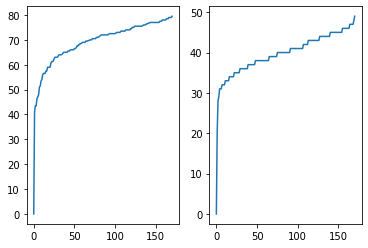

In [ ]:
plt.subplot(1,2,1) # row, column, and which plot
plt.plot(x,quizzes)
plt.subplot(1,2,2)
plt.plot(x,exams)

Its a bit deceiving with the subplots having different axes, right?

So, let's use plt.ylim to change the limits of the y-axis

(0.0, 90.0)

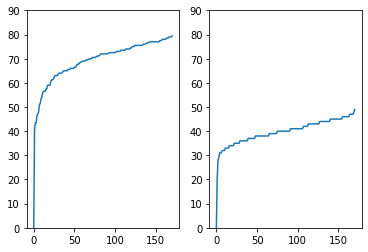

In [ ]:
plt.subplot(1,2,1) # row, column, and which plot
plt.plot(x,quizzes)
plt.ylim([0,90])
plt.subplot(1,2,2)
plt.plot(x,exams)
plt.ylim([0,90])

With the functional approach, using plt.subplot basically makes that plot the active subplot

*In the below code, which subplot with the data appear?*

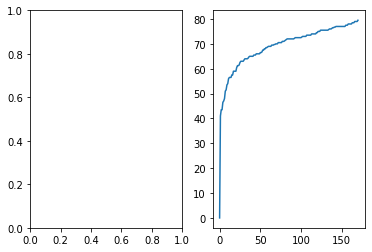

In [ ]:
plt.subplot(1,2,1) # row, column, and which plot
plt.subplot(1,2,2)
plt.plot(x,quizzes)

#### So, now let's move to that other approach. This is called the object based approach. The advantage of this approach is that you have a lot more control of your figure

#### First we create the figure object, then we add the axes


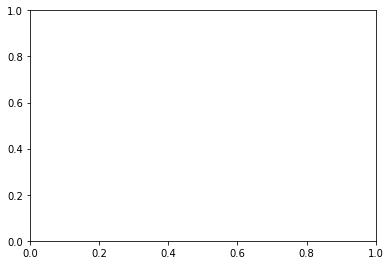

In [ ]:
fig = plt.figure()

axes = fig.add_axes([0.1,0.1,0.8,0.8]) # just setting up the size

Next, we put the stuff onto those axes

This makes it much easier to debug because you know exactly what you are plotting on (i.e., the axes). Whereas in the other approach, you have to scroll up or remember which axes you are on


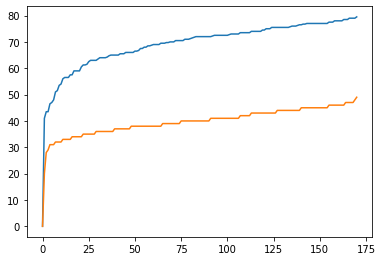

In [ ]:
fig = plt.figure()

axes = fig.add_axes([0.1,0.1,0.8,0.8]) # left, bottom, width, height

axes.plot(x,quizzes)
axes.plot(x,exams)

Now, I'm adding the x and y labels, plus the title, which is similar to how it was done before

Text(0.5, 1.0, 'Grades')

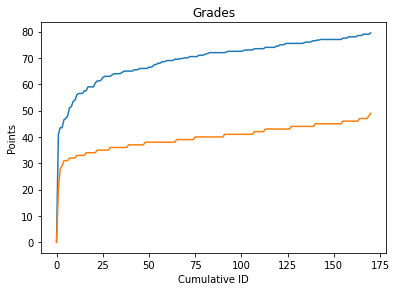

In [ ]:
fig = plt.figure()

axes = fig.add_axes([0.1,0.1,0.8,0.8]) # left, bottom, width, height

axes.plot(x,quizzes)
axes.plot(x,exams)
axes.set_xlabel('Cumulative ID')
axes.set_ylabel('Points')
axes.set_title('Grades')

Lets add subplots, manually first. Later, I will show you how to do this automatically

Basically, to add subplots manually, you are simply adding multiple canvas (i.e., axes)

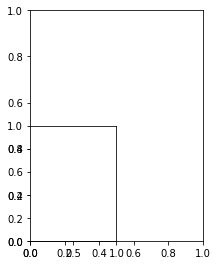

In [ ]:
fig = plt.figure()

axes1 = fig.add_axes([.1,.1,.4,.8]) # left, bottom, width, height
axes2 = fig.add_axes([.1,.1,.2,.4]) # left, bottom, width, height

Its definitely pretty tricky to get things looking like you may imagine, but once you can figure it out, you have a lot of control over your final figure.

Let's say I want one subplot to be large and the others to be smaller. Can do!

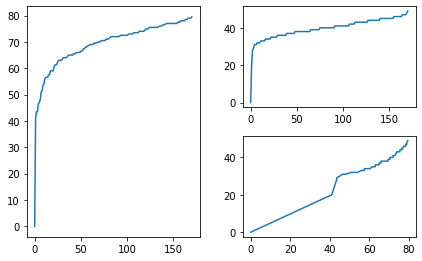

In [ ]:
fig = plt.figure()

axes1 = fig.add_axes([.1,.1,.4,.8])
axes2 = fig.add_axes([.6,.55,.4,.35])
axes3 = fig.add_axes([.6,.1,.4,.35])

axes1.plot(x,quizzes)
axes2.plot(x,exams)
axes3.plot(quizzes,exams) # note - this last plot is meaningless since both data were sorted independently

There is a method to automatically generate the sub plots for you

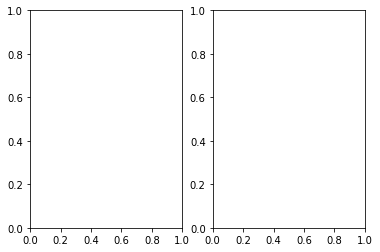

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2)

And like above, you add the plots just like before, but now, you have to reference the index instead of using different axes for each subplot

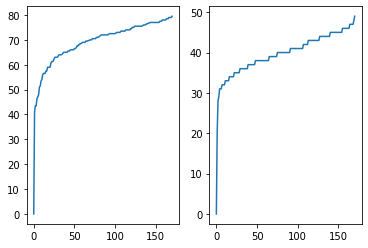

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2)

axes[0].plot(x,quizzes)
axes[1].plot(x,exams)

If you have multiple rows and columns, python wants both the row and column index.



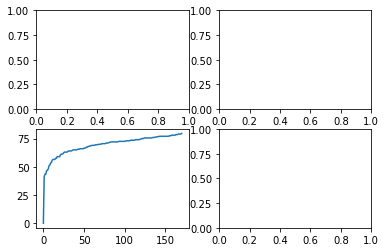

In [ ]:
fig,axes = plt.subplots(nrows=2,ncols=2)

axes[1,0].plot(x,quizzes)

Sometimes though, you will notice there are some problems when generating subplots automatically

I'm going to create a little for loop here to make a bunch of plots and add labels to these plots

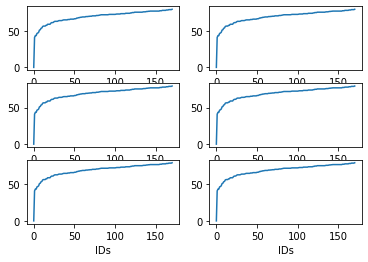

In [ ]:
fig,axes = plt.subplots(nrows=3,ncols=2)

for i in np.arange(0,3):
  for j in np.arange(0,2):
    axes[i,j].plot(x,quizzes)
    axes[i,j].set_xlabel('IDs')

If this happens with your plots, add tight_layout at the end

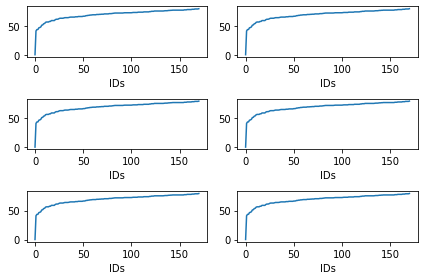

In [ ]:
fig,axes = plt.subplots(nrows=3,ncols=2)

for i in np.arange(0,3):
  for j in np.arange(0,2):
    axes[i,j].plot(x,quizzes)
    axes[i,j].set_xlabel('IDs')

plt.tight_layout()

Let's take the above code and do a few more interesting things. Let's add some color to some of them

*Which row should be green?*

*Which column should have the markers present?*

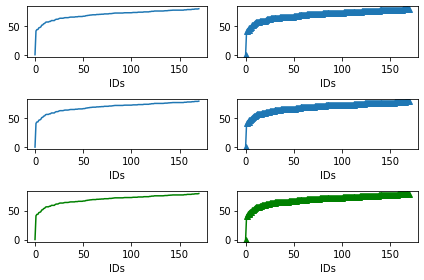

In [ ]:
fig,axes = plt.subplots(nrows=3,ncols=2)

for i in np.arange(0,3): # rows
  for j in np.arange(0,2): # columns

    if j == 1 and i == 2:
      axes[i,j].plot(x,quizzes,marker='^',color='g')
    elif j == 1 and i !=2:
      axes[i,j].plot(x,quizzes,marker='^')
    elif j !=1 and i ==2:
      axes[i,j].plot(x,quizzes,color='g')
    else:
      axes[i,j].plot(x,quizzes)

    axes[i,j].set_xlabel('IDs')

plt.tight_layout()

Cool.

Let's play around with not sorted

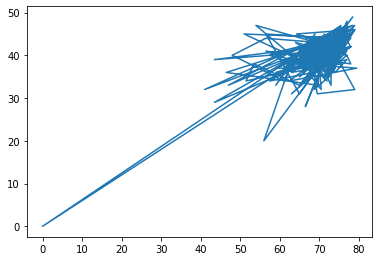

In [ ]:
fig = plt.figure()

axes = fig.add_axes([0.1,0.1,0.8,0.8]) # left, bottom, width, height

axes.plot(data['quizzes'],data['final_EXAM'])

#### Oh wow. That's gross. 

#### *What if we get rid of the lines? Think this will improve things?*

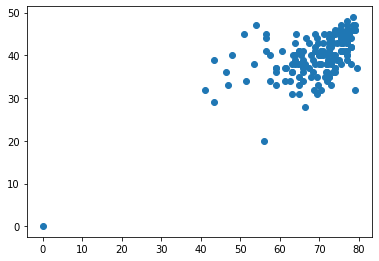

In [ ]:
fig = plt.figure()

axes = fig.add_axes([0.1,0.1,0.8,0.8]) # left, bottom, width, height

axes.plot(data['quizzes'],data['final_EXAM'],linestyle='',marker='o')

This looks better, but let's get rid of the person with the zero in quiz and exam

*How to do that?*

In [ ]:
data2 = data[data['quizzes']>0]

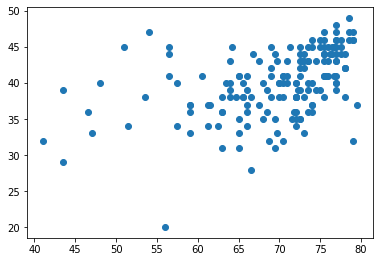

In [ ]:
fig = plt.figure()

axes = fig.add_axes([0.1,0.1,0.8,0.8]) # left, bottom, width, height

axes.plot(data2['quizzes'],data2['final_EXAM'],linestyle='',marker='o')

Much better

Let's say I want a plot where we can see attended versus not attended and the effect that has on quizzes and exams

How would we do that?

Well, we can subset based on that column

In [ ]:
data2.head()

,quizzes,attendedClass,finalgrade,final_EXAM,student
0,78.50,1,99.38,46,Linnie Lietz
1,64.25,0,95.78,45,Mitch Mustain
2,76.75,0,97.42,41,Salina Chavera
3,69.00,1,92.50,38,Kimberely Conwell
4,64.00,0,92.50,39,Zack Burk


In [ ]:
attended_df = data2[data2['attendedClass']==1]
not_attended_df = data2[data2['attendedClass']==0]
print(attended_df.head(1))
print(not_attended_df.head(1))

   quizzes  attendedClass  finalgrade  final_EXAM       student
0     78.5              1       99.38          46  Linnie Lietz
   quizzes  attendedClass  finalgrade  final_EXAM        student
1    64.25              0       95.78          45  Mitch Mustain


#### How should we plot it?



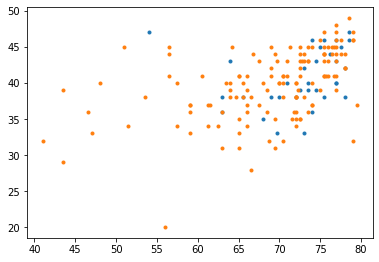

In [ ]:
fig = plt.figure()

axes = fig.add_axes([0.1,0.1,0.8,0.8]) # left, bottom, width, he

axes.plot(attended_df['quizzes'],attended_df['final_EXAM'],linestyle='',marker='.')
axes.plot(not_attended_df['quizzes'],not_attended_df['final_EXAM'],linestyle='',marker='.')


#### What about the labels?

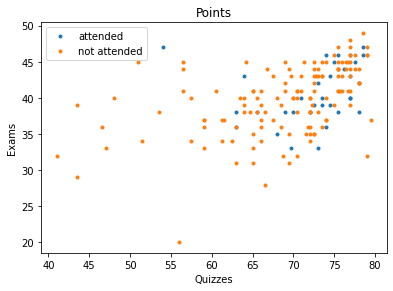

In [ ]:
fig = plt.figure()

axes = fig.add_axes([0.1,0.1,0.8,0.8]) # left, bottom, width, he

axes.plot(attended_df['quizzes'],attended_df['final_EXAM'],linestyle='',marker='.',label='attended')
axes.plot(not_attended_df['quizzes'],not_attended_df['final_EXAM'],linestyle='',marker='.',label='not attended')
axes.set_xlabel('Quizzes')
axes.set_ylabel('Exams')
axes.set_title('Points')
axes.legend()

Let's also change the limits of the axes. We can do that using set_xlim and set_ylim

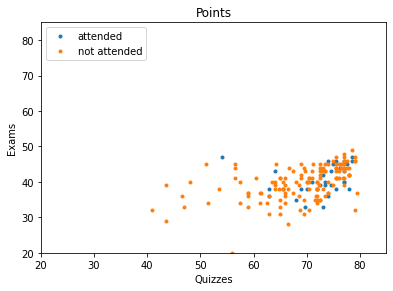

In [ ]:
fig = plt.figure()

axes = fig.add_axes([0.1,0.1,0.8,0.8]) # left, bottom, width, he

axes.plot(attended_df['quizzes'],attended_df['final_EXAM'],linestyle='',marker='.',label='attended')
axes.plot(not_attended_df['quizzes'],not_attended_df['final_EXAM'],linestyle='',marker='.',label='not attended')
axes.set_xlabel('Quizzes')
axes.set_ylabel('Exams')
axes.set_title('Points')
axes.set_xlim([20,85])
axes.set_ylim([20,85])
axes.legend(loc=2)

Maybe in this case we wouldn't want that limits to be the same since it makes it really hard to see the actual data

And lastly, let's  adjust the x ticks

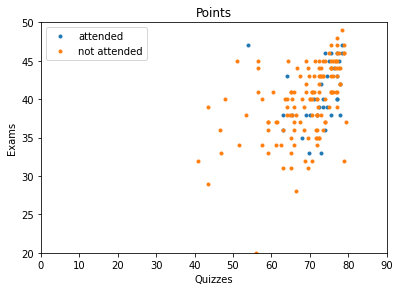

In [ ]:
fig = plt.figure()

axes = fig.add_axes([0.1,0.1,0.8,0.8]) # left, bottom, width, he

axes.plot(attended_df['quizzes'],attended_df['final_EXAM'],linestyle='',marker='.',label='attended')
axes.plot(not_attended_df['quizzes'],not_attended_df['final_EXAM'],linestyle='',marker='.',label='not attended')
axes.set_xlabel('Quizzes')
axes.set_ylabel('Exams')
axes.set_title('Points')
axes.set_xlim([20,85])
axes.set_ylim([20,50])
axes.legend(loc=2)
axes.set_xticks(np.arange(0,100,10))
axes.legend(loc=2)

Not bad!

Let's save this beauty

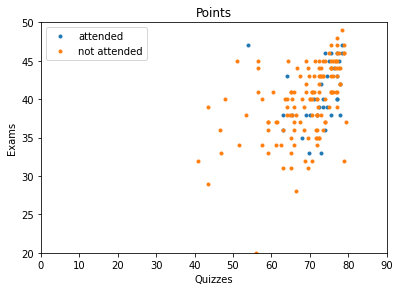

In [ ]:
fig

I can use the object savefig

In [ ]:
fig.savefig('fig1')

The default is a png

PDFs are nice because they are vectorized

In [ ]:
fig.savefig('fig1.pdf')

If it is not vectorized (as is the case with JPG and PNG), then you should be mindful of the dots per inch, which is about the resolution of the figue

In [ ]:
fig.savefig('fig1_500.jpg',dpi = 500)
fig.savefig('fig1_50.jpg',dpi = 50)

Next class, we will talk about Seaborn, which is basically the quick and fancy way to generate figures